<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Pabloacostatec-A01794035-/blob/main/Reto_Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reto-> Entrega 1 (16/11)

Portada con datos generales: Nombre de la entrega, tu nombre, matrícula, materia, profesor, fecha

Nombres:



*   Juan Pablo Acosta López - A01794035
*   Yocelín Juárez

Ciencia y análitica de datos








In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.

import requests, zipfile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.impute import SimpleImputer
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt 
import seaborn as sns
import math as math

In [2]:
#This method Imports zip directly
# importing necessary modules

print('Downloading started')

#Defining the zip file URL
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/Calidad_del_agua')
Rawdf = pd.read_csv('/content/sample_data/Calidad_del_agua/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',sep=',', encoding_errors='ignore')
df = Rawdf

pd.set_option('display.max_columns', 100)


In [3]:
pd.set_option('display.max_rows', 100)
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestic

In [4]:
Rawdf.isnull().any()

for col in df.columns:
    print('La columna: ',col,'tiene ',Rawdf[col].isna().sum(), 'valores nulos en total')

La columna:  CLAVE tiene  0 valores nulos en total
La columna:  SITIO tiene  0 valores nulos en total
La columna:  ORGANISMO_DE_CUENCA tiene  0 valores nulos en total
La columna:  ESTADO tiene  0 valores nulos en total
La columna:  MUNICIPIO tiene  0 valores nulos en total
La columna:  ACUIFERO tiene  0 valores nulos en total
La columna:  SUBTIPO tiene  0 valores nulos en total
La columna:  LONGITUD tiene  0 valores nulos en total
La columna:  LATITUD tiene  0 valores nulos en total
La columna:  PERIODO tiene  0 valores nulos en total
La columna:  ALC_mg/L tiene  4 valores nulos en total
La columna:  CALIDAD_ALC tiene  4 valores nulos en total
La columna:  CONDUCT_mS/cm tiene  6 valores nulos en total
La columna:  CALIDAD_CONDUC tiene  6 valores nulos en total
La columna:  SDT_mg/L tiene  1068 valores nulos en total
La columna:  SDT_M_mg/L tiene  2 valores nulos en total
La columna:  CALIDAD_SDT_ra tiene  2 valores nulos en total
La columna:  CALIDAD_SDT_salin tiene  2 valores nulos en

Debido a que se obersevan valores nulos en las pruebas de calidad pero cada una de las filas representa un pozo en específico el cuál es importante tener información, se van a imputar todos los valores con la moda de cada una de las columnas. 

De igual manera se presentan 1 columna especial (SDT_mg/L) las cuales tienen muchos valores nulos, tanto que una inputación no sería práctica y genereraría sesgos, por lo tantos se decide quitar esas columnas de los datos. La variable "Contaminantes" de igual manera se observan muchos valores nulos, sin embargo, en este caso se entiende que pudiese exister la falta de contaminantes.

De igual manera para temas de normalización se van a normalizar todas las columnas numéricas y se les va a inputar un valor de mediana para todos aquellos que sean valores nulos.



In [5]:
Rawdf = Rawdf.drop(['SDT_mg/L'], axis=1)
print(Rawdf.dtypes)

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_CR               object
HG_TOT_m

Se observan que muchos valores que en realidad deberían de tomarse como numéricos decimales no se están considerando así originalmente en la Base de datos, esto se debe a que existe la etiqueta '<' que indica que se tienen valores muy bajos, por lo tan se procederá a quitar este string de la etiqueta para que se quede sólo el número

In [6]:
Rawdf.replace('<20',20, inplace= True)
Rawdf.replace('<25',25, inplace= True)
Rawdf.replace('<1.1',1.1, inplace= True)
Rawdf.replace('<0.02',0.02, inplace= True)
Rawdf.replace('<0.01',0.01, inplace= True)
Rawdf.replace('<0.003',0.003, inplace= True)
Rawdf.replace('<0.005',0.005, inplace= True)
Rawdf.replace('<0.0005',0.0005, inplace= True)
Rawdf.replace('<0.0015',0.0015, inplace= True)
Rawdf.replace('<0.025',0.025, inplace= True)
Rawdf.replace('<0.2',0.2, inplace= True)

Rawdf.replace('SI',1, inplace= True)
Rawdf.replace('NO',0, inplace= True)
Rawdf.replace('ND',0, inplace= True)

Rawdf

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,DLAGU6516,POZO R013 CAADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,"FLUO,AS,",1,1,1,1,0,1,1,1,0,1,1,1,1,1,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Verde,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable - Excelente,0.005,Potable - Excelente,0.0015,Potable - Excelente,0.025,Potable - Excelente,Rojo,"NO3,",1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,1545.8,Cultivos con manejo especial,Ligeramente salobres,0.2,Baja,752.096,Muy dura e indeseable usos industrial y domestico,1.1,Potable - Excelente,14.615488,No apta como FAAP,0.01,Potable - Excelente,0.003,Potable - Excelente,0.005,Potable - Excelente,0.0005,Potable 

In [7]:
Numeric_Columns_List = ['SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L',
                        'CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L','LONGITUD','LATITUD','PERIODO']

for i in range(0, len(Numeric_Columns_List)):
  Rawdf[Numeric_Columns_List[i]] = pd.to_numeric(Rawdf[Numeric_Columns_List[i]])

String_Columns_List = ['CALIDAD_CONDUC','CALIDAD_SDT_ra','CALIDAD_SDT_salin','CALIDAD_FLUO','CALIDAD_DUR','CALIDAD_COLI_FEC','CALIDAD_N_NO3',
                       'CALIDAD_AS','CALIDAD_CD','CALIDAD_CR','CALIDAD_HG','CALIDAD_PB','CALIDAD_MN','CALIDAD_FE','CLAVE','SITIO','ORGANISMO_DE_CUENCA',
                       'ESTADO','MUNICIPIO','ACUIFERO','SUBTIPO','SEMAFORO','CONTAMINANTES']

for i in range(0, len(String_Columns_List)):
  Rawdf[String_Columns_List[i]].values.astype('str')

Binary_Columns_List = ['CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF',
                       'CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']

for i in range(0, len(Binary_Columns_List)):
  Rawdf[Binary_Columns_List[i]].values.astype('bool')

String_Columns_List = []

print(Rawdf.dtypes)

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR               object
HG_TOT_m

In [8]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))

describe(Rawdf, ['median'])

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,1066.000000,1068.000000,1067.000000,1068.000000,1067.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.101567,1.075600,347.938073,355.490356,4.319759,0.019618,0.003030,0.013276,0.000557,0.005282,0.072478,0.410387,0.941011,0.879213,0.931648,0.931648,0.820225,0.787453,0.942884,0.922285,0.881086,0.998127,0.985955,0.999064,0.988764,0.919476,0.872659
std,6.703263,3.887670,0.0,116.874291,1245.563674,2751.530590,1.924278,359.669452,2052.457014,8.345134,0.035209,0.000894,0.154391,0.000467,0.003254,0.376512,5.537974,0.235714,0.326032,0.252467,0.252467,0.384180,0.409301,0.232173,0.267849,0.323839,0.043254,0.117731,0.030600,0.105452,0.272231,0.333511
min,-116.664250,14.561150,2020.0,26.640000,50.400000,25.000000,0.200000,20.000000,1.100000,0.020000,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,337.500000,0.267175,121.194800,1.100000,0.650294,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.025000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,916.100000,1.139850,453.930000,13.250000,5.201698,0.010000,0.003000,0.005000,0.000500,0.005000,0.009947,0.173380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
median,-102.174180,22.617190,2020.0,215.527500,815.000000,550.400000,0.503500,245.335800,1.100000,2.080932,0.010000,0.003000,0.005000,0.000500,0.005000,0.001500,0.046960,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Con los datos convertidos al tipo de dato correcto, se puede entonces hacer un análisis estadístico a todas las columnas

Tipos de variables: 
CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_M_mg/L              float64
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L          float64
CALIDAD_FLUO             object
DUR_mg/L                float64
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL     float64
CALIDAD_COLI_FEC         object
N_NO3_mg/L              float64
CALIDAD_N_NO3            object
AS_TOT_mg/L             float64
CALIDAD_AS               object
CD_TOT_mg/L             float64
CALIDAD_CD               object
CR_TOT_mg/L             float64
CALIDAD_CR         

ValueError: ignored

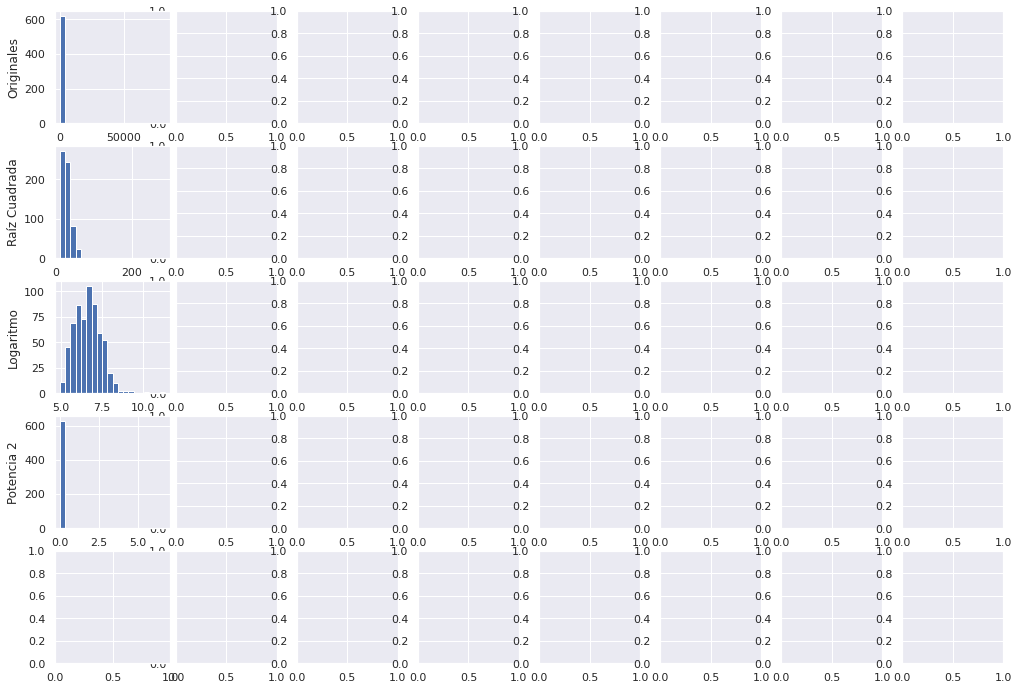

In [9]:
#Esto se aplica sólo para ver cuál es la mejor transformación para cada tipo de variable
variables_a_transformar = Numeric_Columns_List

num_iterations = (int(len(variables_a_transformar)))

Plotdf = pd.DataFrame(Rawdf)
Plotdf.dropna(inplace=True)

print('Tipos de variables: ')
print(Plotdf.dtypes)
print('distribuciones de las variables: ')

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 8)    

for k in range(0,num_iterations):       
     # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = Plotdf[variables_a_transformar[k]]        #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    
    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                     #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    
    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Plotdf[variables_a_transformar[k]] )          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    
    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(np.array(df[variables_a_transformar[k]]).reshape(-1,1),method="box-cox")          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                    #En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

plt.show()